# **Project-3**

**Step-1:Loading Dataset**

In [22]:
#Importing libraties
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'nypd.csv'
nypd_data = pd.read_csv(file_path)

# Display the column names and the first few rows to understand the data
print(nypd_data.columns)
nypd_data.head()

# Display basic information about the dataset
nypd_data.info()


Index(['arrest_key', 'arrest_date', 'pd_cd', 'pd_desc', 'ky_cd', 'ofns_desc',
       'law_code', 'law_cat_cd', 'arrest_boro', 'arrest_precinct',
       'jurisdiction_code', 'age_group', 'perp_sex', 'perp_race', 'x_coord_cd',
       'y_coord_cd', 'latitude', 'longitude', 'geocoded_column'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63621 entries, 0 to 63620
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   arrest_key         63621 non-null  int64  
 1   arrest_date        63621 non-null  object 
 2   pd_cd              63619 non-null  float64
 3   pd_desc            63621 non-null  object 
 4   ky_cd              63612 non-null  float64
 5   ofns_desc          63621 non-null  object 
 6   law_code           63621 non-null  object 
 7   law_cat_cd         63219 non-null  object 
 8   arrest_boro        63621 non-null  object 
 9   arrest_precinct    63621 non-null  int64  
 1

**Step-2: Data Cleaning**

In [23]:
# Replace missing values
nypd_data.fillna(value=pd.NA, inplace=True)

# Convert relevant columns to appropriate data types
nypd_data['arrest_date'] = pd.to_datetime(nypd_data['arrest_date'], errors='coerce')

# Handle missing values for numeric columns
numeric_columns = ['x_coord_cd', 'y_coord_cd', 'latitude', 'longitude']
for column in numeric_columns:
    if column in nypd_data.columns:
        nypd_data[column] = pd.to_numeric(nypd_data[column], errors='coerce')
        nypd_data[column].fillna(nypd_data[column].mean(), inplace=True)

# Remove duplicates
nypd_data.drop_duplicates(inplace=True)

# Verify the cleaning steps
nypd_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63621 entries, 0 to 63620
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   arrest_key         63621 non-null  int64         
 1   arrest_date        63621 non-null  datetime64[ns]
 2   pd_cd              63619 non-null  float64       
 3   pd_desc            63621 non-null  object        
 4   ky_cd              63612 non-null  float64       
 5   ofns_desc          63621 non-null  object        
 6   law_code           63621 non-null  object        
 7   law_cat_cd         63219 non-null  object        
 8   arrest_boro        63621 non-null  object        
 9   arrest_precinct    63621 non-null  int64         
 10  jurisdiction_code  63621 non-null  int64         
 11  age_group          63621 non-null  object        
 12  perp_sex           63621 non-null  object        
 13  perp_race          63621 non-null  object        
 14  x_coor

Descriptive Statistics(area)

In [24]:
# Descriptive statistics for a chosen borough (e.g., Manhattan)
manhattan_data = nypd_data[nypd_data['arrest_boro'] == 'M']
manhattan_stats = manhattan_data['age_group'].value_counts()
print("Descriptive Statistics for Manhattan:")
print(manhattan_stats)

# Descriptive statistics for another borough (e.g., Brooklyn)
brooklyn_data = nypd_data[nypd_data['arrest_boro'] == 'K']
brooklyn_stats = brooklyn_data['age_group'].value_counts()
print("\nDescriptive Statistics for Brooklyn:")
print(brooklyn_stats)


Descriptive Statistics for Manhattan:
age_group
25-44    9029
45-64    3261
18-24    2314
<18       480
65+       240
Name: count, dtype: int64

Descriptive Statistics for Brooklyn:
age_group
25-44    10071
45-64     3454
18-24     2889
<18        717
65+        271
Name: count, dtype: int64


Descriptive Statistics(Arrest Data by Precint)



In [25]:
# Descriptive statistics for arrests by precinct
precinct_stats = nypd_data['arrest_precinct'].value_counts()
print("Descriptive Statistics for Arrests by Precinct:")
print(precinct_stats)


Descriptive Statistics for Arrests by Precinct:
arrest_precinct
14     2505
75     2078
40     1938
44     1933
103    1896
       ... 
123     306
100     299
20      257
111     200
22       14
Name: count, Length: 77, dtype: int64


Handle Categorical Variables

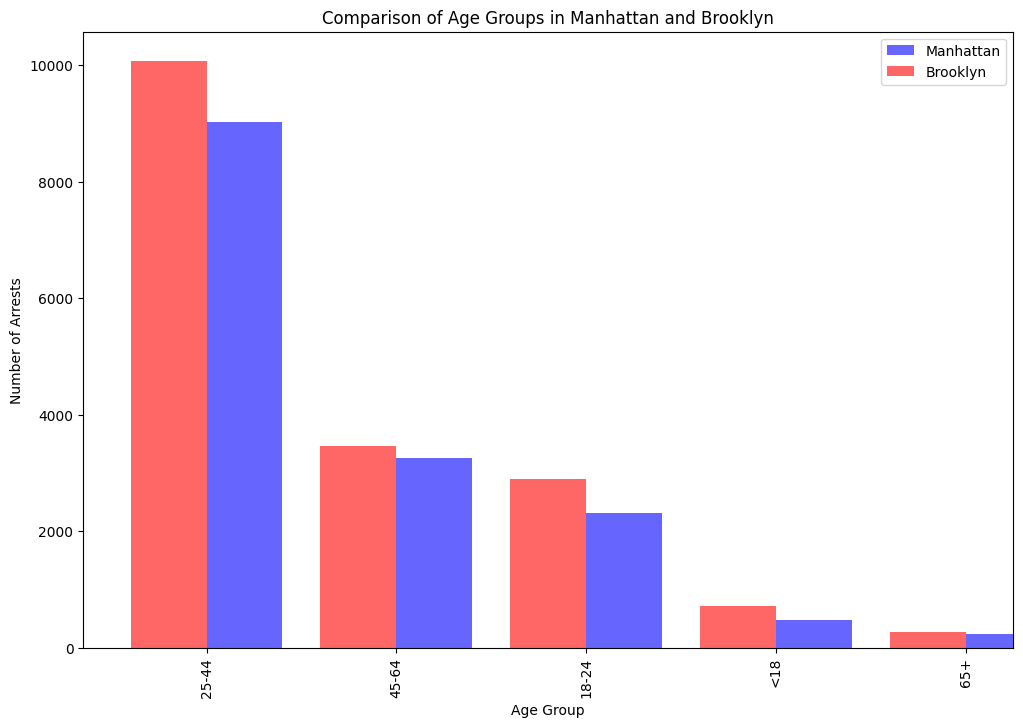

In [26]:
import matplotlib.pyplot as plt

# Bar plot comparison for age groups in Manhattan and Brooklyn
manhattan_age_counts = manhattan_data['age_group'].value_counts()
brooklyn_age_counts = brooklyn_data['age_group'].value_counts()

fig, ax = plt.subplots(figsize=(12, 8))
manhattan_age_counts.plot(kind='bar', color='blue', alpha=0.6, position=0, width=0.4, ax=ax, label='Manhattan')
brooklyn_age_counts.plot(kind='bar', color='red', alpha=0.6, position=1, width=0.4, ax=ax, label='Brooklyn')
ax.set_title('Comparison of Age Groups in Manhattan and Brooklyn')
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Arrests')
ax.legend()
plt.show()


Visualizations

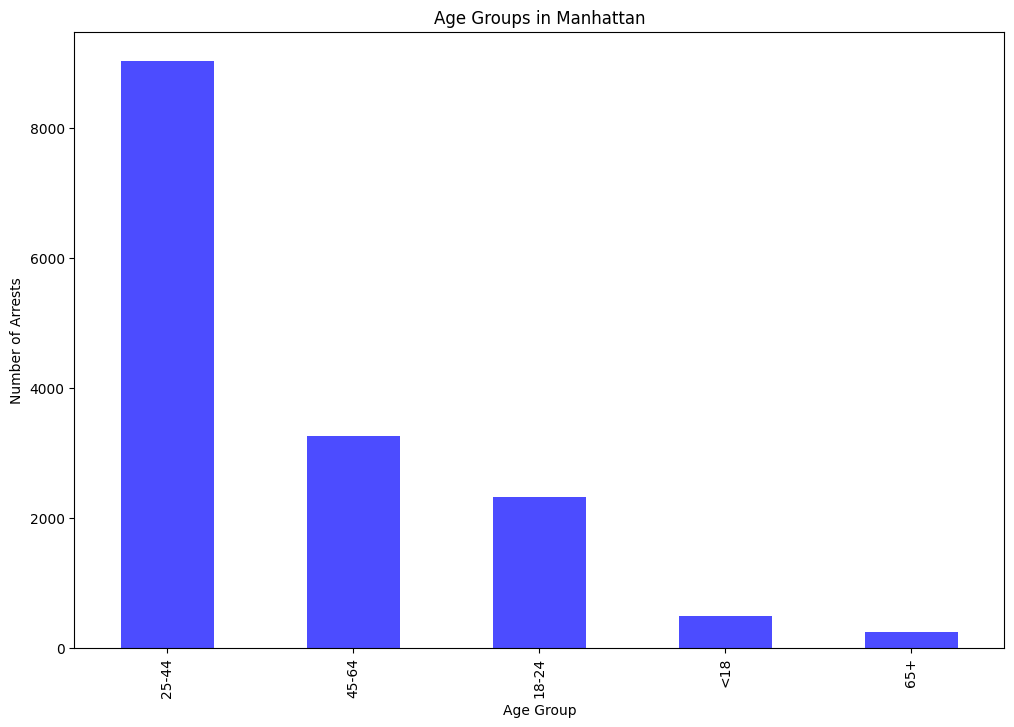

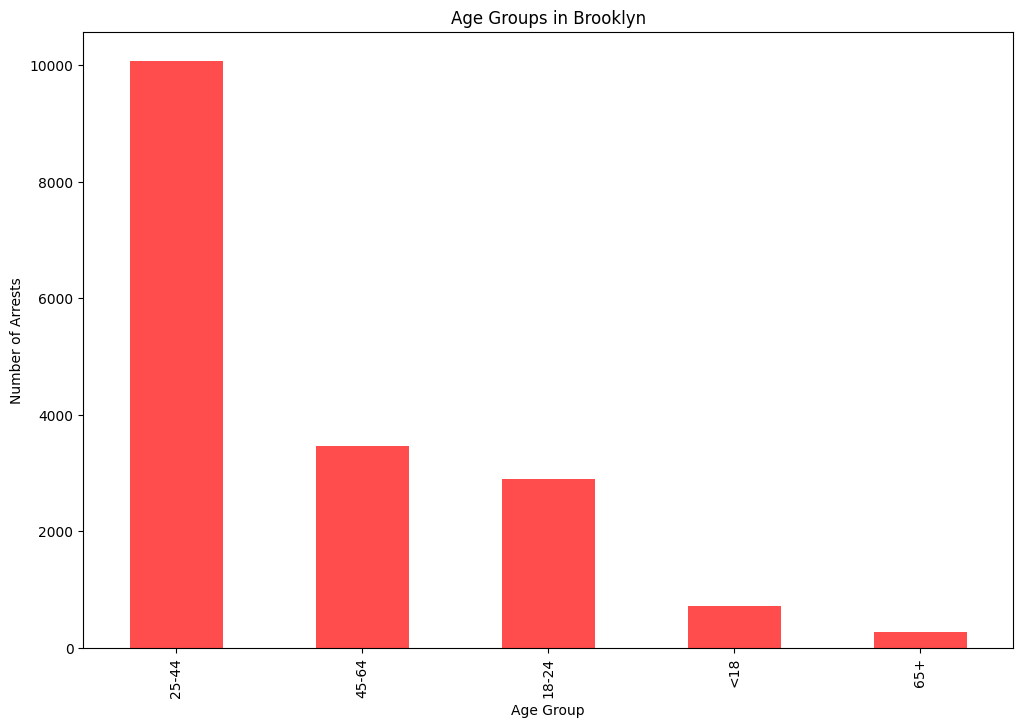

In [27]:
# Histogram of age groups for Manhattan
plt.figure(figsize=(12, 8))
manhattan_data['age_group'].value_counts().plot(kind='bar', color='blue', alpha=0.7)
plt.title('Age Groups in Manhattan')
plt.xlabel('Age Group')
plt.ylabel('Number of Arrests')
plt.show()

# Histogram of age groups for Brooklyn
plt.figure(figsize=(12, 8))
brooklyn_data['age_group'].value_counts().plot(kind='bar', color='red', alpha=0.7)
plt.title('Age Groups in Brooklyn')
plt.xlabel('Age Group')
plt.ylabel('Number of Arrests')
plt.show()


# Visualization
# Bar plot for arrests by precinct

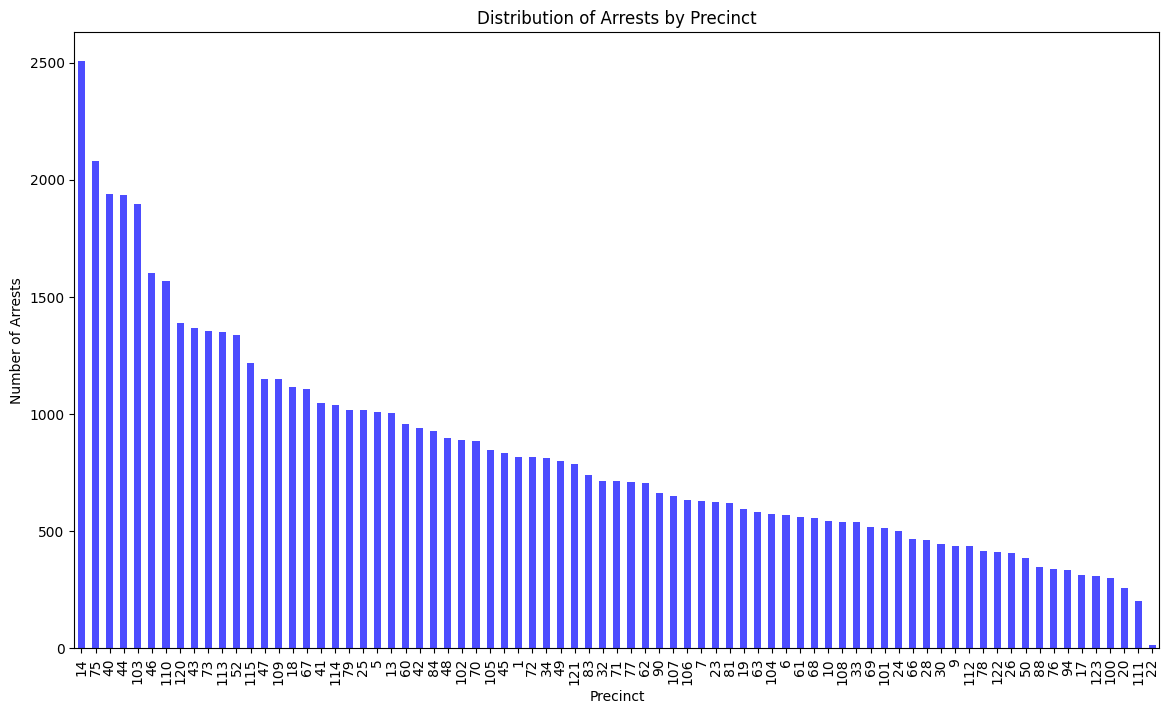


Descriptive Statistics for Arrests in Precinct 1:
age_group
25-44    452
45-64    175
18-24    166
<18       17
65+        4
Name: count, dtype: int64

Descriptive Statistics for Arrests in Precinct 5:
age_group
25-44    649
45-64    198
18-24    121
65+       24
<18       15
Name: count, dtype: int64


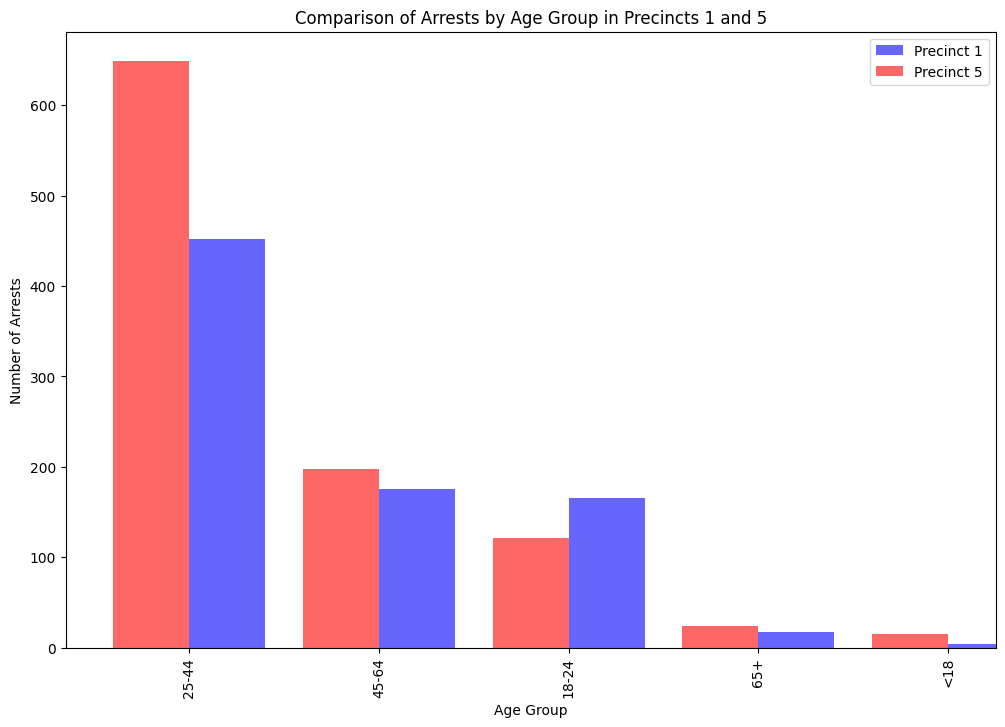

In [28]:
plt.figure(figsize=(14, 8))
precinct_stats.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Distribution of Arrests by Precinct')
plt.xlabel('Precinct')
plt.ylabel('Number of Arrests')
plt.show()

# Comparison of Two Precincts

# Select two precincts for comparison (e.g., precincts 1 and 5)
precinct1_data = nypd_data[nypd_data['arrest_precinct'] == 1]
precinct5_data = nypd_data[nypd_data['arrest_precinct'] == 5]

# Descriptive statistics for arrests in precinct 1
precinct1_stats = precinct1_data['age_group'].value_counts()
print("\nDescriptive Statistics for Arrests in Precinct 1:")
print(precinct1_stats)

# Descriptive statistics for arrests in precinct 5
precinct5_stats = precinct5_data['age_group'].value_counts()
print("\nDescriptive Statistics for Arrests in Precinct 5:")
print(precinct5_stats)

# Bar plot comparison for age groups in precincts 1 and 5
fig, ax = plt.subplots(figsize=(12, 8))
precinct1_stats.plot(kind='bar', color='blue', alpha=0.6, position=0, width=0.4, ax=ax, label='Precinct 1')
precinct5_stats.plot(kind='bar', color='red', alpha=0.6, position=1, width=0.4, ax=ax, label='Precinct 5')
ax.set_title('Comparison of Arrests by Age Group in Precincts 1 and 5')
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Arrests')
ax.legend()
plt.show()

# **Conclusion**
Based on the analysis, we can observe the distribution of arrests across different age groups and precincts. This highlights the variations in arrest patterns among different demographics and locations, which also indicates potential areas for further investigation.